### 1) Import libraries/ Dipendancies -

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

from scipy.stats import zscore,mode
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

import pandas_profiling
import ydata_profiling

import json
import pickle

import plotly.express as ex

import generalutils

### 2) Data Gathering and Data Validitation - 

In [ ]:
# Recieved data according to Schema file and got the data
# for DQ check we have used Microsoft Excel

In [42]:
#Reading CSV File -
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

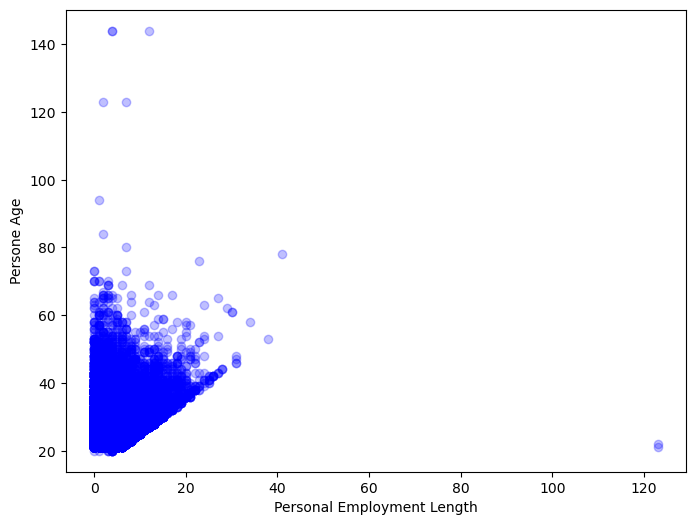

In [50]:
# plots a scatter plot of pesonal employment length against age
plt.figure(figsize=(8, 6))

plt.scatter(df['person_emp_length'], df['person_age'], color='blue', alpha=0.25)
plt.xlabel('Personal Employment Length')
plt.ylabel('Persone Age')

plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

Here we can see the higher correlation between age and income as they are may working from long time in the company,
we can also see the outliers in the data. Persons age above 100 years is not feasible in the any sense. the person 
whoes age is above 100 years he or she not going to apply for loan in any condition. If there is entry of that case 
then this person is definitely going to default. In case of person employment length above 60 years length is not 
feasible in the buisness scenario.

In [51]:
# checking for indices of persons employment length grater than 60
indices = df[df["person_emp_length"] > 60].index
indices

Int64Index([0, 210], dtype='int64')

on the indices 0 and 210 there are ahe outliers so after discussion with buisness experties will remove those. we have got 2 outliers in the data.

In [52]:
# length of records where outliers are present 
len(indices)

2

In [53]:
# Checking for which records will be dropped
df.loc[[0,210]]

person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
210          21         192000              MORTGAGE              123.0   

    loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0      PERSONAL          D      35000          16.02            1   
210     VENTURE          A      20000           6.54            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                   0.59                         Y                           3  
210                 0.10                         N                           4

In [54]:
# Dropping the records based on the indices
df_1 = df.drop([0,210],axis=0)
df_1.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2

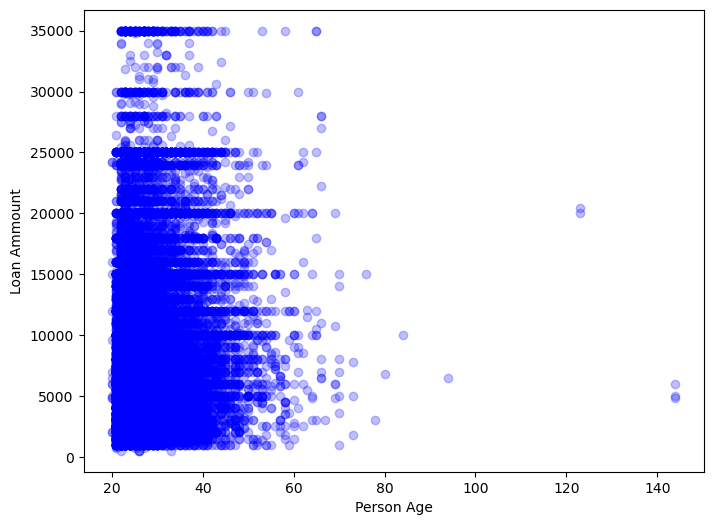

In [55]:
# plots a scatter plot of pesonal employment length against age
plt.figure(figsize=(8,6))
plt.scatter(df_1["person_age"],df_1["loan_amnt"],color = "blue",alpha=0.25)
plt.xlabel("Person Age")
plt.ylabel("Loan Ammount")
plt.show()

We discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

In [56]:
# checking for indices of persons employment length grater than 100
indices = df_1[df_1["person_age"] > 100].index
indices

Int64Index([81, 183, 575, 747, 32297], dtype='int64')

In [57]:
# we are dropping those Entries from df and creating new df
df_2 = df_1.drop([81, 183, 575, 747, 32297],axis=0)
df_2.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2

### 3) EDA (Exploratory Data Analysis) - 

In [ ]:
Steps Involved in EDA - 
    1) Information about Datset
    2) Describe Dataset
    3) Find Missing Values / Percentage of Missing Values
    4) Value Counts of Each Object Feature
    4) Desciding Encoding Types
    5) Outliers Detection
    6) Correlation with Target Feature
    7) VIF (Variance Inflation Factor)
    8) Status of Target Feature
    9) EDA report

- Information about Datset

In [61]:
# Checking information of dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


Here we have got basic information about data like non null count, memory usage and Data type of Features. there are 
missing values in the person_emp_length and loan_int_rate. there are 4 object features which are person_home_ownership,
loan_intent, loand_grade and cb_person_default_on_file.

- Describe Dataset

In [62]:
# Here we are printing Description of dataset and got all the stats.
df_2.describe().T

count          mean           std      min  \
person_age                  32574.0     27.718426      6.204987    20.00   
person_income               32574.0  65878.480813  52531.938809  4000.00   
person_emp_length           31679.0      4.782064      4.034948     0.00   
loan_amnt                   32574.0   9588.018051   6320.249598   500.00   
loan_int_rate               29459.0     11.011529      3.240497     5.42   
loan_status                 32574.0      0.218180      0.413017     0.00   
loan_percent_income         32574.0      0.170202      0.106755     0.00   
cb_person_cred_hist_length  32574.0      5.804108      4.053873     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00       94.00  
person_income               38500.00  55000.00  79200.00  2039784.00  
person_emp_length               2.00      4.00      7.00       41.00  
loan_amnt                    5000.00   8000.00  12200.00    35000.00  
loan_int_rate                   7.90     10.99     13.47       23.22  
loan_status                     0.00      0.00      0.00        1.00  
loan_percent_income             0.09      0.15      0.23        0.83  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00

As observed, we can notice the presence of outliers in `person_age`  and `person_emp_length`.

In [2]:
# creates a cross table of the loan intent and loan status
pd.crosstab(df_cr_loan['loan_intent'], df_cr_loan['loan_status'], margins=True)

NameError: name 'pd' is not defined

- Find Missing Values / Percentage of Missing Values

In [63]:
# Count of Missing Values in Each Numerical Feature, 
# There are Missing values in person_emp_length and loan_int_rate features.
df_2.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [64]:
# Percentage of Missing Values in Each Numerical Feature
# There are 2.74 % Missing vales in person_emp_length feature and 9.56 % in loan_int_rate Feature
df_2.isna().mean() * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747590
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.562842
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

- Value Counts of Each Object Feature

In [65]:
# Here we are checking for the Value counts of each Object datatype features.Targetting 4 Object Datatype 
# feature which are person_home_ownership,loan_intent,loan_grade and cb_person_default_on_file
cols = df_2.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(df[feature].value_counts().sort_values(ascending=False))
    print()

Column Name -  person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Column Name -  loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

Column Name -  loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Column Name -  cb_person_default_on_file
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64



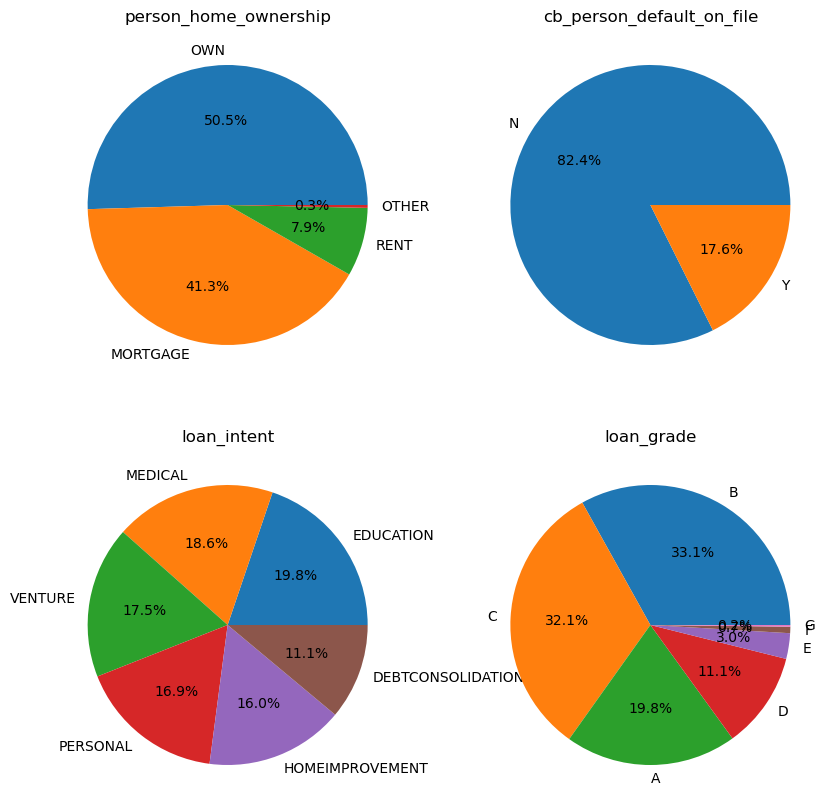

In [66]:
# Pie plot of Value counts in the feature Person_home_ownership,loan_intent,cb_person_default_on_file and loan_grade
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
line1 = plt.pie(df_2["person_home_ownership"].value_counts(),labels = df_2["person_home_ownership"].unique(),autopct="%1.1f%%")
plt.title('person_home_ownership')
ax1 = fig.add_subplot(223)
line2 = plt.pie(df_2["loan_intent"].value_counts(),labels = df_2["loan_intent"].unique(),autopct="%1.1f%%")
plt.title('loan_intent')
ax1 = fig.add_subplot(222)
line3 = plt.pie(df_2["cb_person_default_on_file"].value_counts(),labels = df_2["cb_person_default_on_file"].unique()
                ,autopct="%1.1f%%")
plt.title('cb_person_default_on_file')
ax1 = fig.add_subplot(224)
line4 = plt.pie(df_2["loan_grade"].value_counts(),labels = df_2["loan_grade"].unique(),autopct="%1.1f%%")
plt.title('loan_grade')
plt.show()

In [43]:
ex.pie(df_2,names='person_home_ownership',title='person_home_ownership',hole=0.33)

In [67]:
ex.pie(df_2,names='loan_intent',title='loan_intent',hole=0.33)

In [68]:
ex.pie(df_2,names='cb_person_default_on_file',title='Propotion Of CB Person Default On File',hole=0.33)

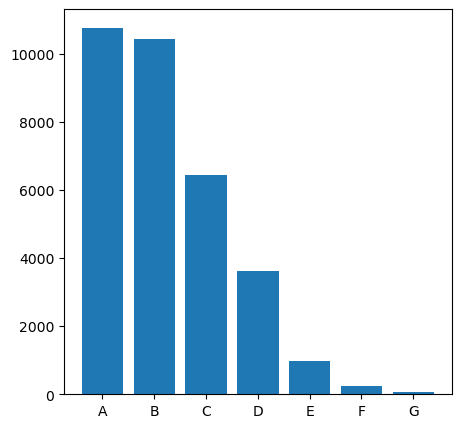

In [82]:
# bar graph of Value counts in the feature loan-grade
dict1 = df_2["loan_grade"].value_counts().to_dict()
x1 = list(dict1.keys())
y1 = list(dict1.values())
plt.figure(figsize=(5,5))
plt.bar(x1,y1)
plt.show()

- Desciding Encoding Types

In [83]:
# Checking for any sequence is the object columns so we can select encoding techniques.
cols = df_2.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(df_2[feature].unique())
    print()

Column Name -  person_home_ownership
['OWN' 'MORTGAGE' 'RENT' 'OTHER']

Column Name -  loan_intent
['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column Name -  loan_grade
['B' 'C' 'A' 'D' 'E' 'F' 'G']

Column Name -  cb_person_default_on_file
['N' 'Y']



In [ ]:
# Here we can clearely see there is no any precedence or sequence in the person_home_ownership, 
# loan_intent and loan_grade Features so we have to use either get_dummies() or OneHotEncoding Technique.

In [ ]:
Features for OneHotEncoding / Get Dummies - person_home_ownership, loan_intent, loan_grade

In [ ]:
# Here we can clearely see there is precedence or sequence in the cb_person_default_on_file
# Feature so we have to use either replace() or Ordinal Encoding Technique.

In [ ]:
Features for OrdinalEncoding / replace - cb_person_default_on_file

In [ ]:
# As there are numerical values in the loan_status feature i.e Target Feature so we doesnt require 
# need of Label Encoding Technique

- Outliers Detection

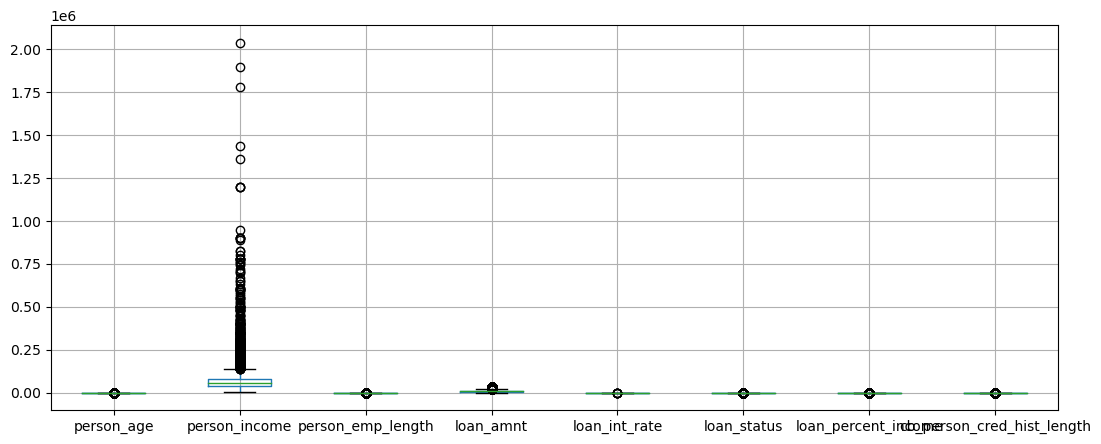

In [69]:
# Here we can see there ae outliers in the every feature
plt.figure(figsize=(13,5))
df_2.boxplot()
plt.show()

<AxesSubplot:xlabel='person_age'>

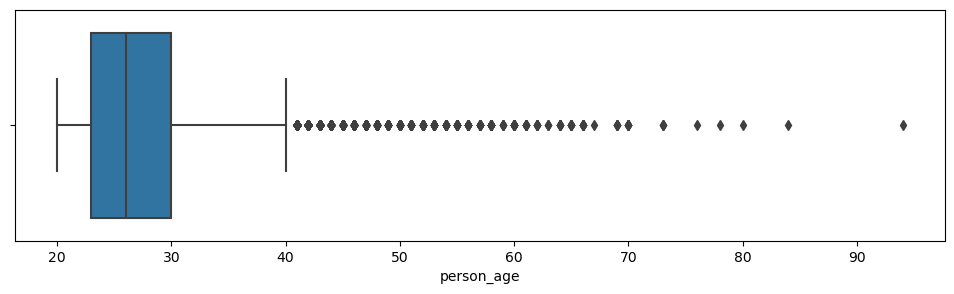

In [70]:
# Checking of outliers in person_age Feature
plt.figure(figsize=(12,3))
sns.boxplot(df_2["person_age"])
# here we can say practically age more than 120 is not possibole so those are outliers.

In [84]:
# Count of outliers in person_age by using Z-score method
z = zscore(df_2["person_age"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in person_age - {len(z1)}")

Count of Outliers in person_age - 553


<AxesSubplot:xlabel='person_income'>

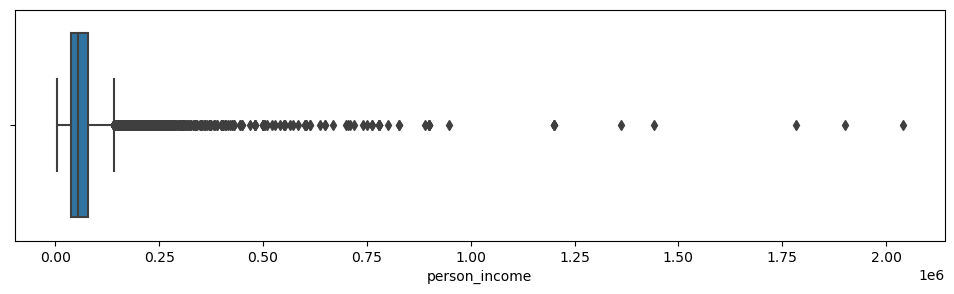

In [71]:
# Checking of outliers in person_income Feature, we can see there is one extreme outlier
# we are not considering 558 are outliers because person can live upto 120 years.
plt.figure(figsize=(12,3))
sns.boxplot(df_2["person_income"])

In [72]:
# Count of outliers in person_income by using Z-score method
z = zscore(df_2["person_income"]).to_list()
z2 = []
for i in z:
    if i > 3 or i <-3:
        z2.append(i)
print(f"Count of Outliers in person_income - {len(z2)}")

Count of Outliers in person_income - 355


In [86]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = df_2["person_income"].quantile(0.25)
q3 = df_2["person_income"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = df_2.loc[(df_2["person_income"] > upper_tail) | (df_2["person_income"] < lower_tail)].shape[0]
print(f"Count of Outliers in person_income - {count}")

Upper tail - 140250.0
Lower tail - -22550.0
Count of Outliers in person_income - 1480


<AxesSubplot:xlabel='person_emp_length'>

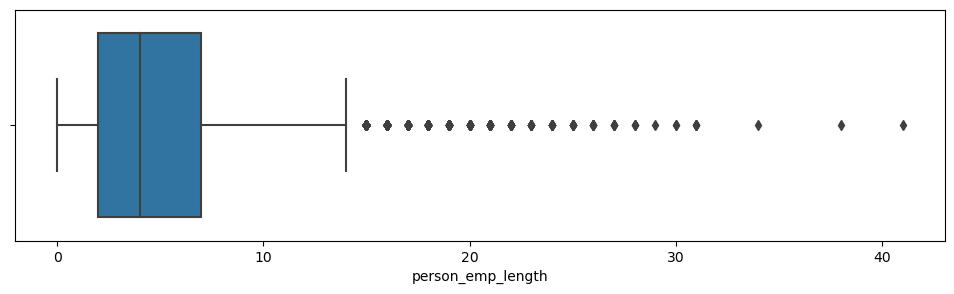

In [87]:
# Checking of outliers in person_emp_length Feature,we can see there is one extreme outlier.
plt.figure(figsize=(12,3))
sns.boxplot(df_2["person_emp_length"])

In [88]:
# Count of outliers in person_emp_length by using Z-score method, here z-score is showing
z = zscore(df_2["person_emp_length"]).to_list()
z1 = []
for i in z:
    if i > 3 or i < -3:
        z1.append(i)
print(f"Count of Outliers in person_emp_length - {len(z1)}")

Count of Outliers in person_emp_length - 0


In [89]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = df_2["person_emp_length"].quantile(0.25)
q3 = df_2["person_emp_length"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = df_2.loc[(df_2["person_emp_length"] > upper_tail) | (df_2["person_emp_length"] < lower_tail)].shape[0]
print(f"Count of Outliers in person_emp_length - {count}")

Upper tail - 14.5
Lower tail - -5.5
Count of Outliers in person_emp_length - 851


<AxesSubplot:xlabel='loan_amnt'>

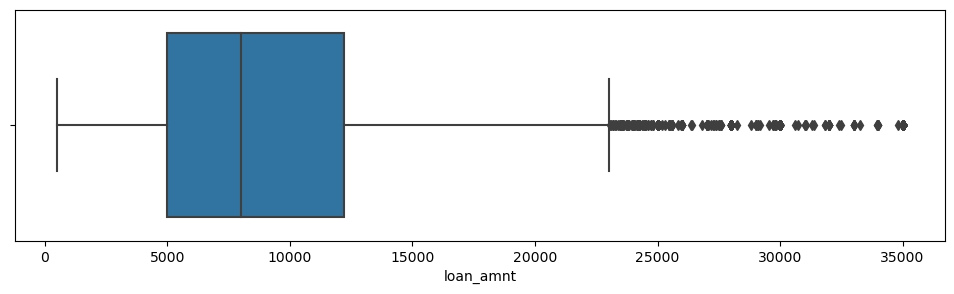

In [75]:
# Checking of outliers in loan_amnt Feature
plt.figure(figsize=(12,3))
sns.boxplot(df_2["loan_amnt"])

In [92]:
# Count of outliers in loan_amnt by using Z-score method
z = zscore(df_2["loan_amnt"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in loan_amnt - {len(z1)}")

Count of Outliers in loan_amnt - 337


<AxesSubplot:xlabel='loan_int_rate'>

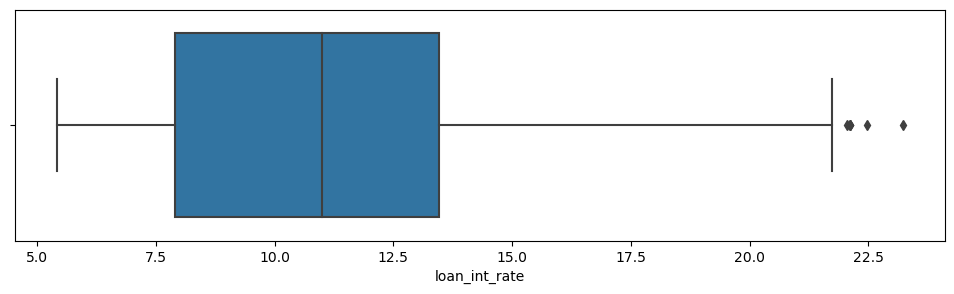

In [90]:
# Checking of outliers in loan_int_rate Feature, Too few outliers in data.
plt.figure(figsize=(12,3))
sns.boxplot(df_2["loan_int_rate"])

In [91]:
# Count of outliers in loan_int_rate by using Z-score method
z = zscore(df_2["loan_int_rate"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in loan_int_rate - {len(z1)}")

Count of Outliers in loan_int_rate - 0


In [92]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = df_2["loan_int_rate"].quantile(0.25)
q3 = df_2["loan_int_rate"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = df_2.loc[(df_2["loan_int_rate"] > upper_tail) | (df_2["loan_int_rate"] < lower_tail)].shape[0]
print(f"Count of Outliers in person_income - {count}")

Upper tail - 21.825000000000003
Lower tail - -0.45500000000000007
Count of Outliers in person_income - 6


<AxesSubplot:xlabel='loan_percent_income'>

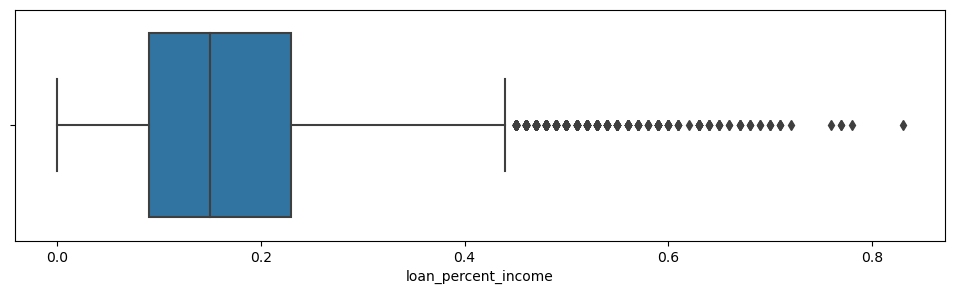

In [77]:
# Checking of outliers in loan_percent_income Feature
plt.figure(figsize=(12,3))
sns.boxplot(df_2["loan_percent_income"])

In [95]:
# Count of outliers in loan_percent_income by using Z-score method
z = zscore(df_2["loan_percent_income"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in loan_percent_income - {len(z1)}")

Count of Outliers in loan_percent_income - 336


<AxesSubplot:xlabel='cb_person_cred_hist_length'>

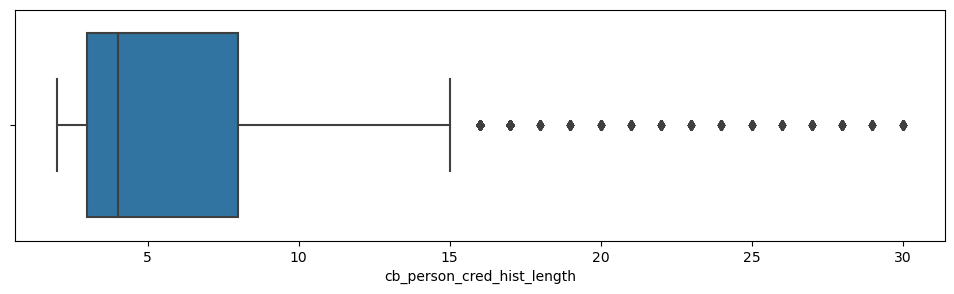

In [78]:
# Checking of outliers in cb_person_cred_hist_length Feature
plt.figure(figsize=(12,3))
sns.boxplot`(df_2["cb_person_cred_hist_length"])

In [96]:
# Count of outliers in cb_person_cred_hist_length by using Z-score method
z = zscore(df_2["cb_person_cred_hist_length"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in cb_person_cred_hist_length - {len(z1)}")

Count of Outliers in cb_person_cred_hist_length - 284


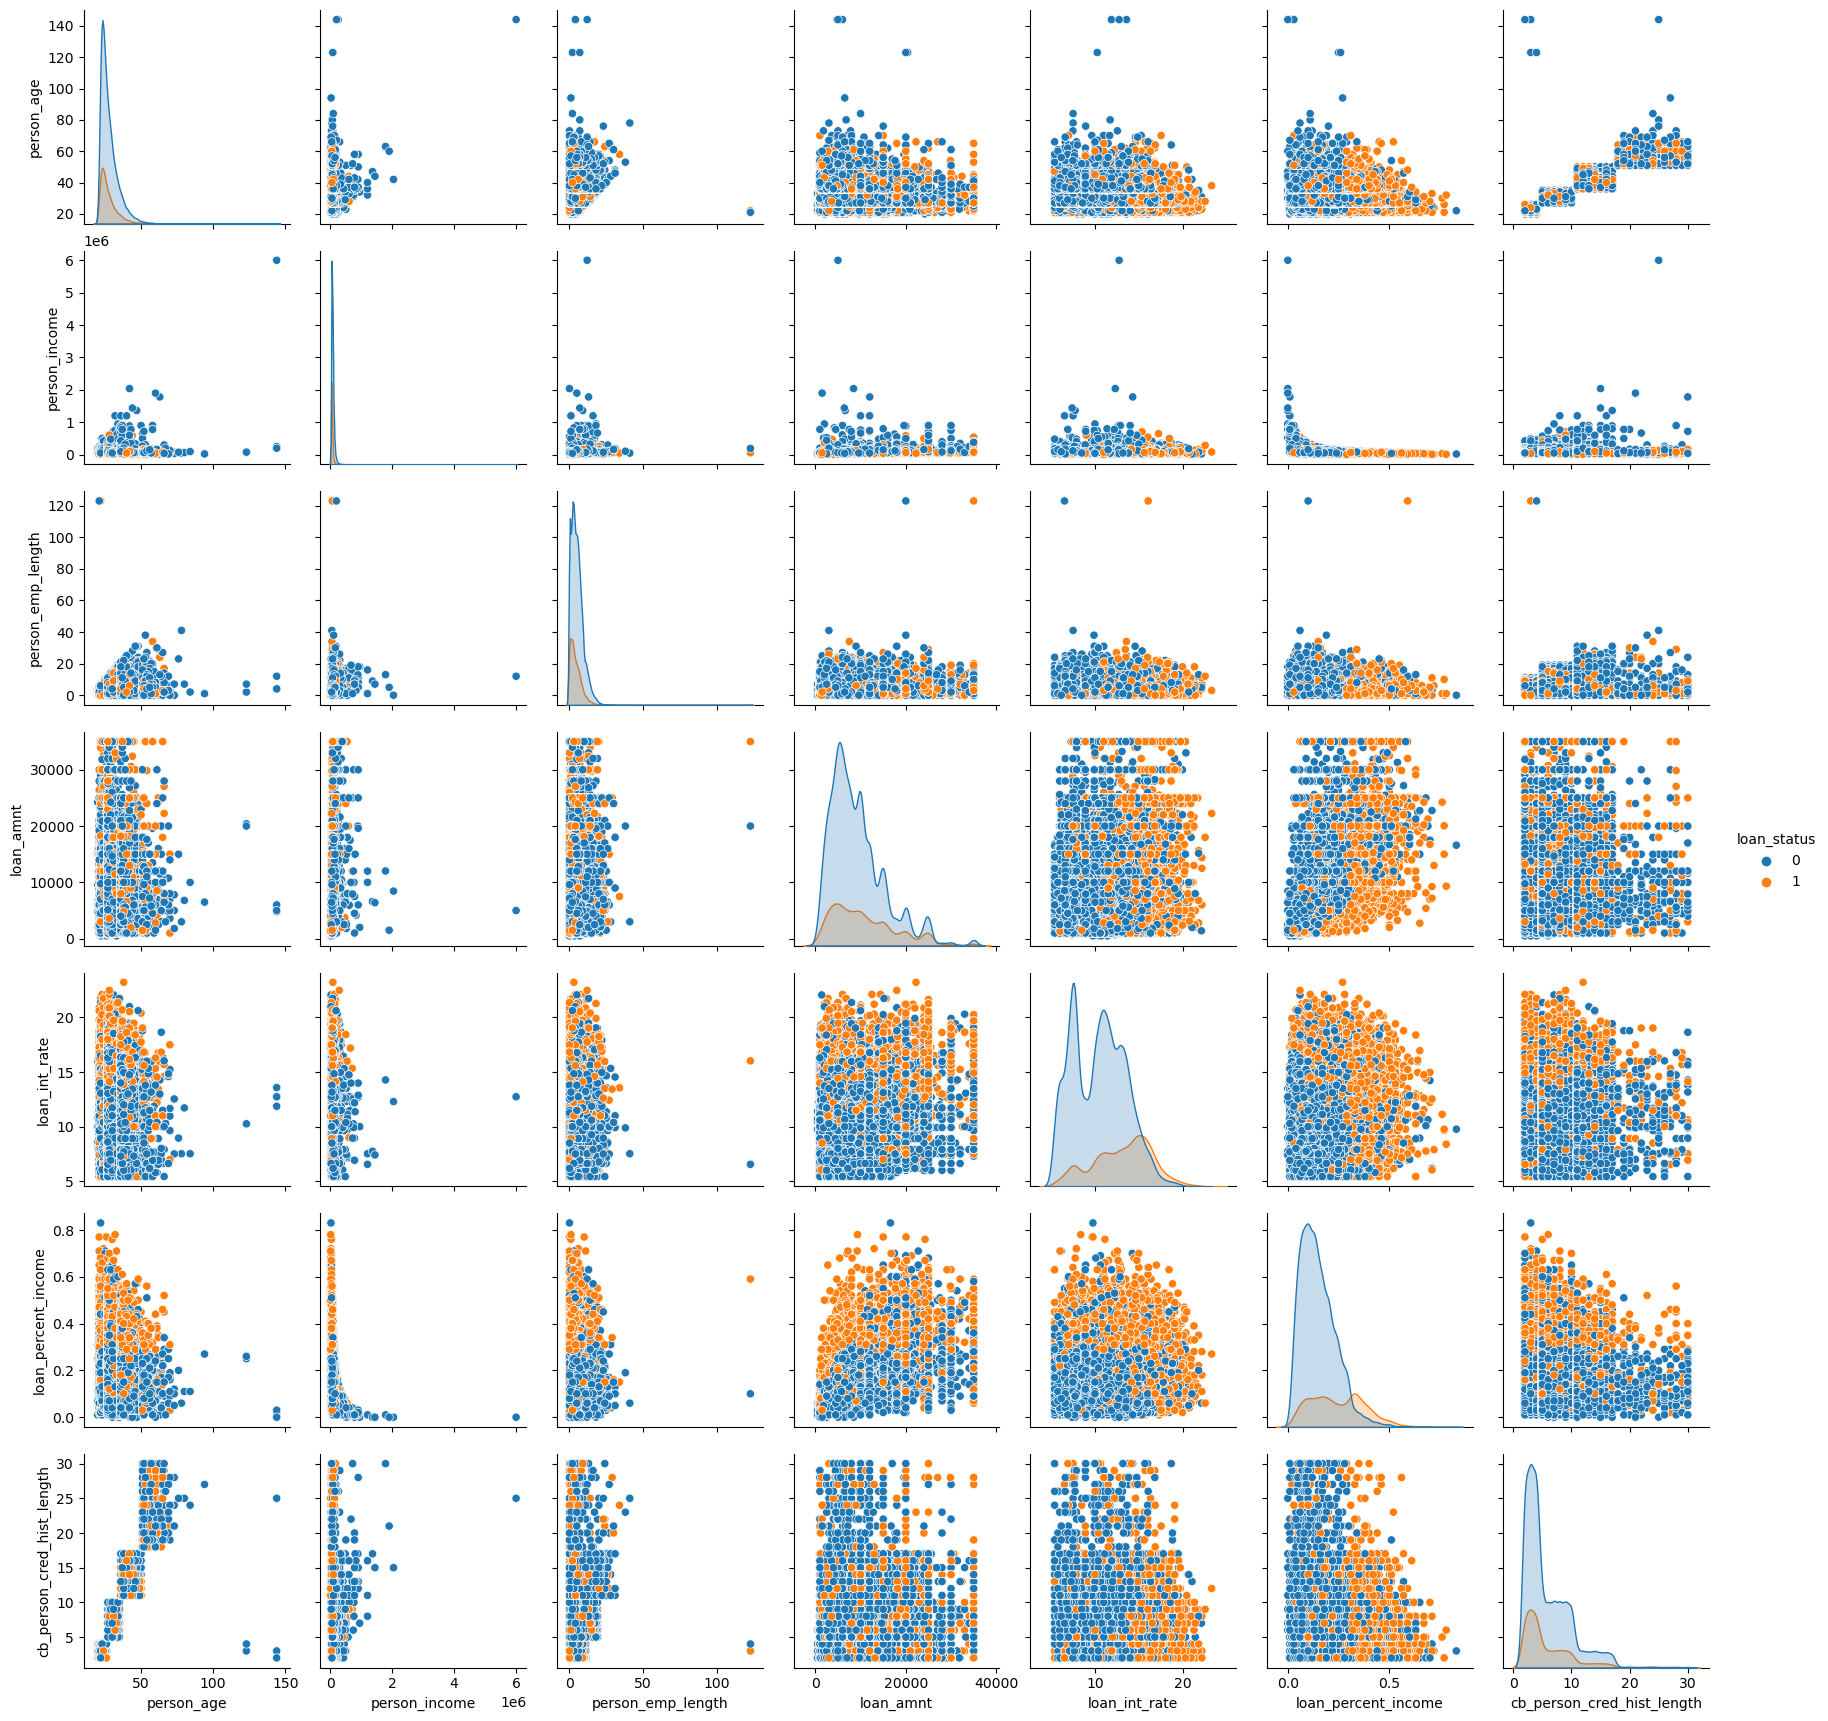

In [43]:
# Pairplot for Distribution
sns.pairplot(df_2,hue="loan_status")

- Correlation with Target Feature

In [105]:
# Checking for Relation of independent feature with dependent features and and we are not getting good correlation.
df_2.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

In [93]:
df2 = df_2.corr().iloc[5,:].to_frame().T
df2

person_age  person_income  person_emp_length  loan_amnt  \
loan_status   -0.020687      -0.168485          -0.085966    0.10524   

             loan_int_rate  loan_status  loan_percent_income  \
loan_status       0.335092          1.0              0.37925   

             cb_person_cred_hist_length  
loan_status                   -0.015472

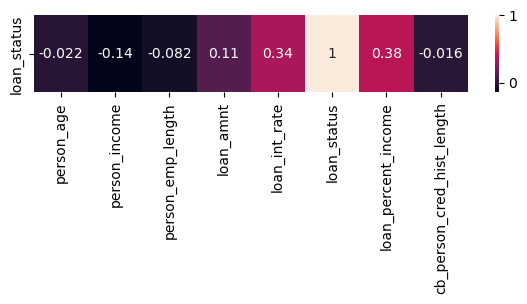

In [81]:
plt.figure(figsize=(7,1))
sns.heatmap(df2,annot=True)
plt.show()

<Figure size 600x1400 with 0 Axes>

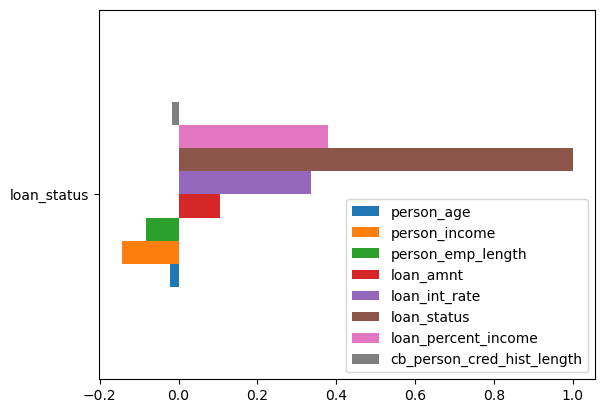

In [136]:
# bar plot of correlation of Loans status feature with respect to all independent features. 
df2.plot(kind="barh")

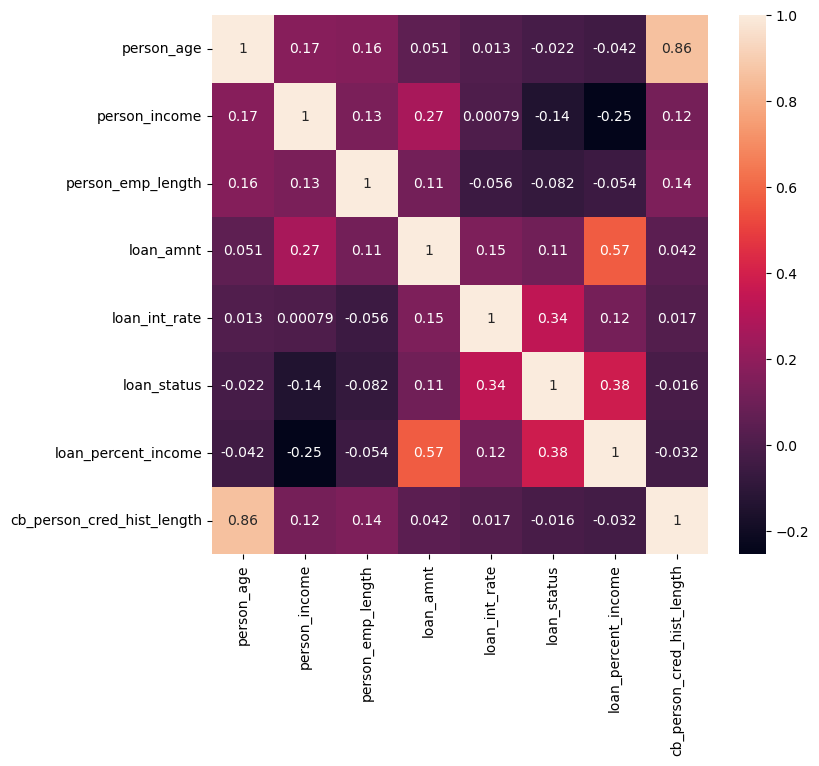

In [121]:
# Heatmap for correlation Values
plt.figure(figsize=(8,7))
sns.heatmap(df_2.corr(),annot=True)
plt.show()

- VIF (Variance Inflation Factor)

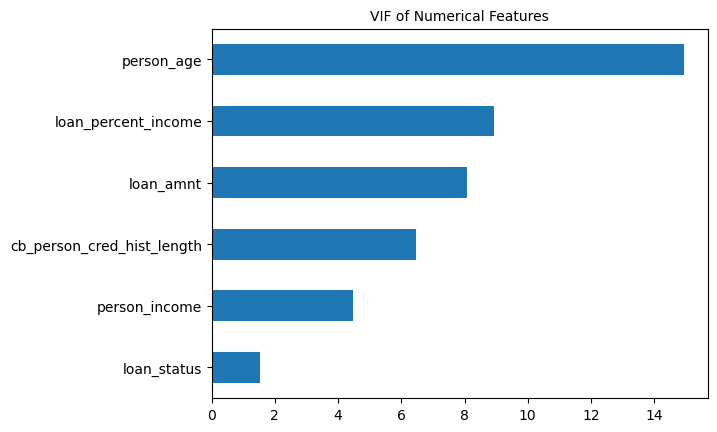

In [94]:
# Checking for relation between independent features. Here im dropping Features having null values
x = df_2.select_dtypes(exclude="object").drop(["loan_int_rate","person_emp_length"],axis=1)
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
x1 = pd.Series(vif_list,index=x.columns)
x1.sort_values().plot(kind="barh")
plt.title("VIF of Numerical Features",fontsize=10)
plt.show()

### - Status of Target Feature

In [ ]:
# First of all We dont require label encoding beacuse target column is actually in numerical datatype.

In [95]:
df_2["loan_status"].value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

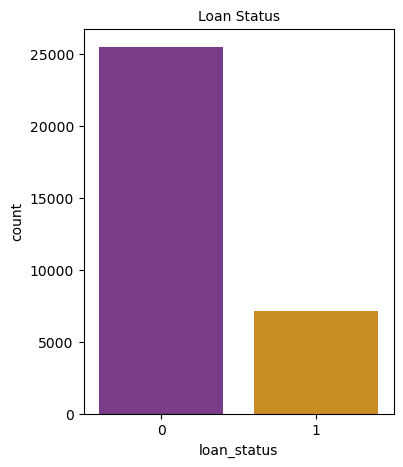

In [96]:
plt.figure(figsize=(4,5))
sns.countplot(df_2["loan_status"], palette='CMRmap')
plt.title("Loan Status",fontsize=10)
plt.show()

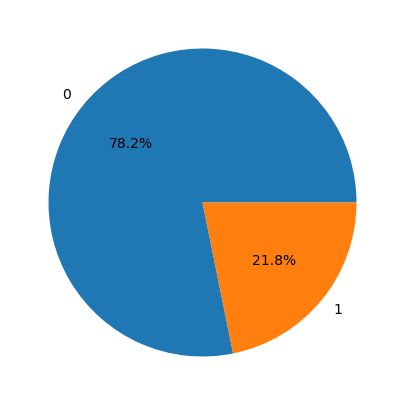

In [97]:
plt.figure(figsize=(5,5))
plt.pie(df_2["loan_status"].value_counts(),labels=df_2["loan_status"].unique()
        ,autopct="%1.1f%%")
plt.show()

In [ ]:
# so here we also got to know that there is bias in the categories so we have to perform sampling on it.
# Major category contains 78.2 percent of data and minor category contains 21.8 per data.

- EDA Report using Pandas Profilling

In [140]:
pf = pandas_profiling.ProfileReport(df_2)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
pf.to_file("EDA Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4) Making Hypothesis for Testing

#### person_age -                 

1) More defaults for the younger peoples

#### person_income -

1) People who defult have less income than people who have not default

#### person_home_ownership -

1) Mortgage have more cases of default followed by rent and own

#### person_emp_length - 

1) There are fewer people of default after long employment term

#### loan_intent -

1) There are more cases of default for personal intent which is followed by educational ,home improvment, medical etc.

2) least cases of default for venture

#### loan_grade -

1) The higher the grade there are fewer cases of default

#### loan_amnt -

1) Median of ammount for non default is lower than median for default.

#### loan_int_rate - 

1) Higher the intrest rate there high defaults.

#### loan_percent_income -

1) People who allocate higher percentage of income to the loan tend to default more than people who allocate less.

#### cb_person_default_on_file - 

1) There are more cases of default those have default on file

#### cb_person_cred_hist_length -

1) There are fewer cases of default those have higher credit history length.

In [ ]:
More defaults for the younger peoples.,People who defult have less income than people who have not default.,
Mortgage have more cases of default followed by rent and own.,There are fewer people of default after long employment term.,
There are more cases of default for personal intent which is followed by educational ,home improvment, medical etc.,
Least cases of default for venture.,The higher the grade there are fewer cases of default.,
Median of ammount for non default is lower than median for default.,Higher the intrest rate there high defaults.,
People who allocate higher percentage of income to the loan tend to default more than people who allocate less.,
There are more cases of default those have default on file.,There are fewer cases of default those have higher credit history length.


## Hypothesis Testing

### Univariate Analysis -

#### Target Variable -

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency
from pyitlib import discrete_random_variable as drv

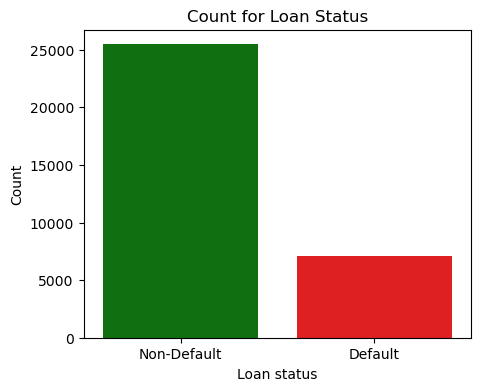

In [60]:
# plots count
ax = sns.countplot(x=df_2['loan_status'],palette=["g","r"])
ax.figure.set_size_inches(5, 4)
ax.set_title("Count for Loan Status", fontsize=12)
ax.set_ylabel("Count", fontsize=10)
ax.set_xlabel("Loan status", fontsize=10)
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()
# we can see that we are dealing with the less cases of default. thus we are dealing with imbalanced dataset.

#### Numerical Variables - 

In [17]:
# creating a dataset for numerical attributes/features
num = df_2.select_dtypes(include=['int64', 'float64'])
num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   
5          21           9900                2.0       2500           7.14   

   loan_status  loan_percent_income  cb_person_cred_hist_length  
1            0                 0.10                           2  
2            1                 0.57                           3  
3            1                 0.53                           2  
4            1                 0.55                           4  
5            1                 0.25                           2

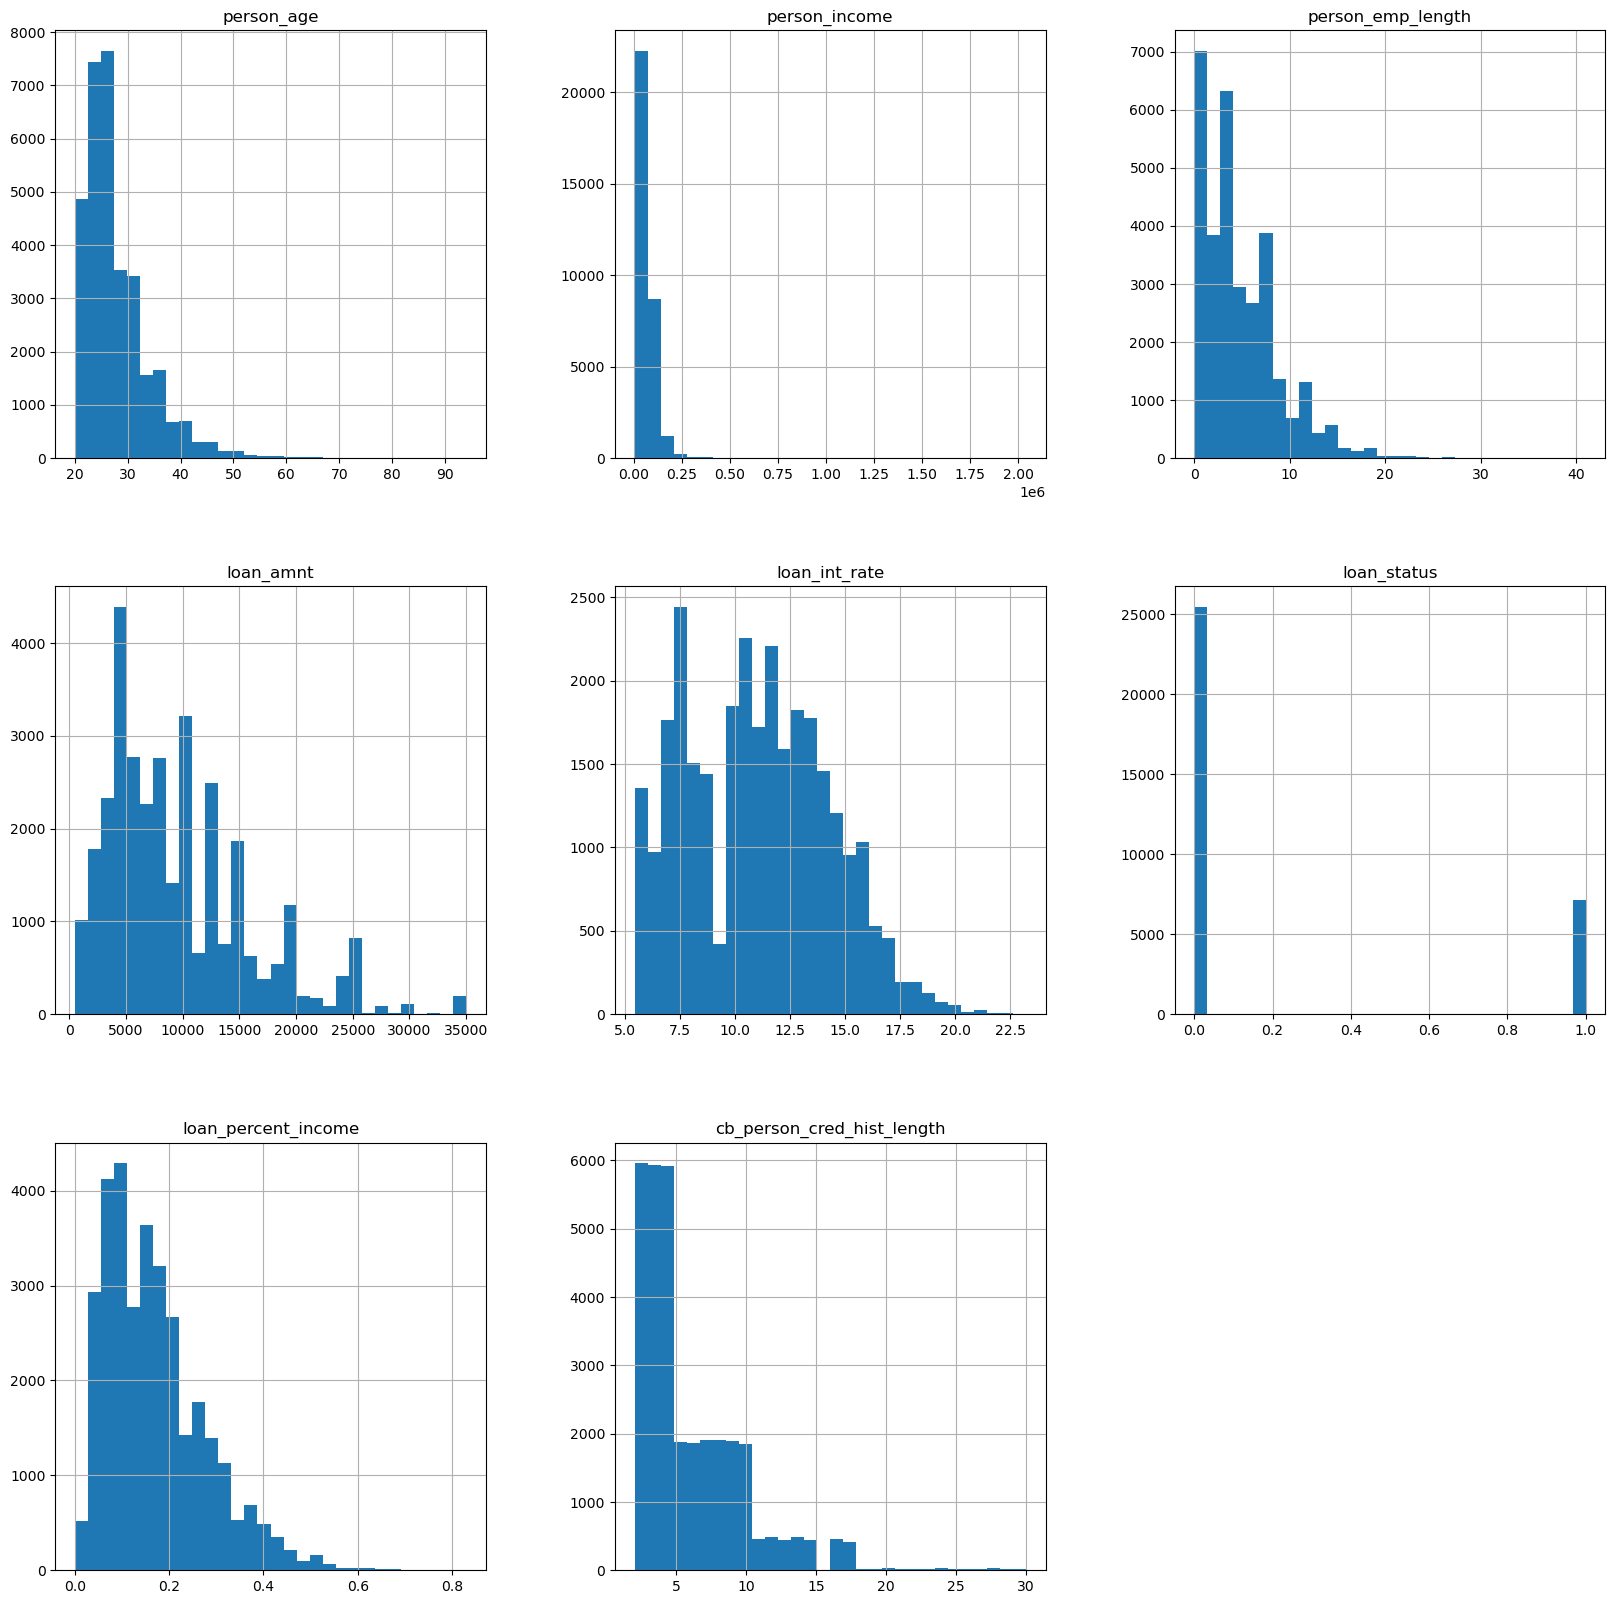

In [18]:
 _ = num.hist(bins=30,figsize=(20,20))
    # here wecan clearly see that no one feature has an normal distribution.

#### Categorical Variables -

In [21]:
# Creating a dataset for Categorical Features -
catego = df_2.select_dtypes(include="object")
catego.head()

person_home_ownership loan_intent loan_grade cb_person_default_on_file
1                   OWN   EDUCATION          B                         N
2              MORTGAGE     MEDICAL          C                         N
3                  RENT     MEDICAL          C                         N
4                  RENT     MEDICAL          C                         Y
5                   OWN     VENTURE          A                         N

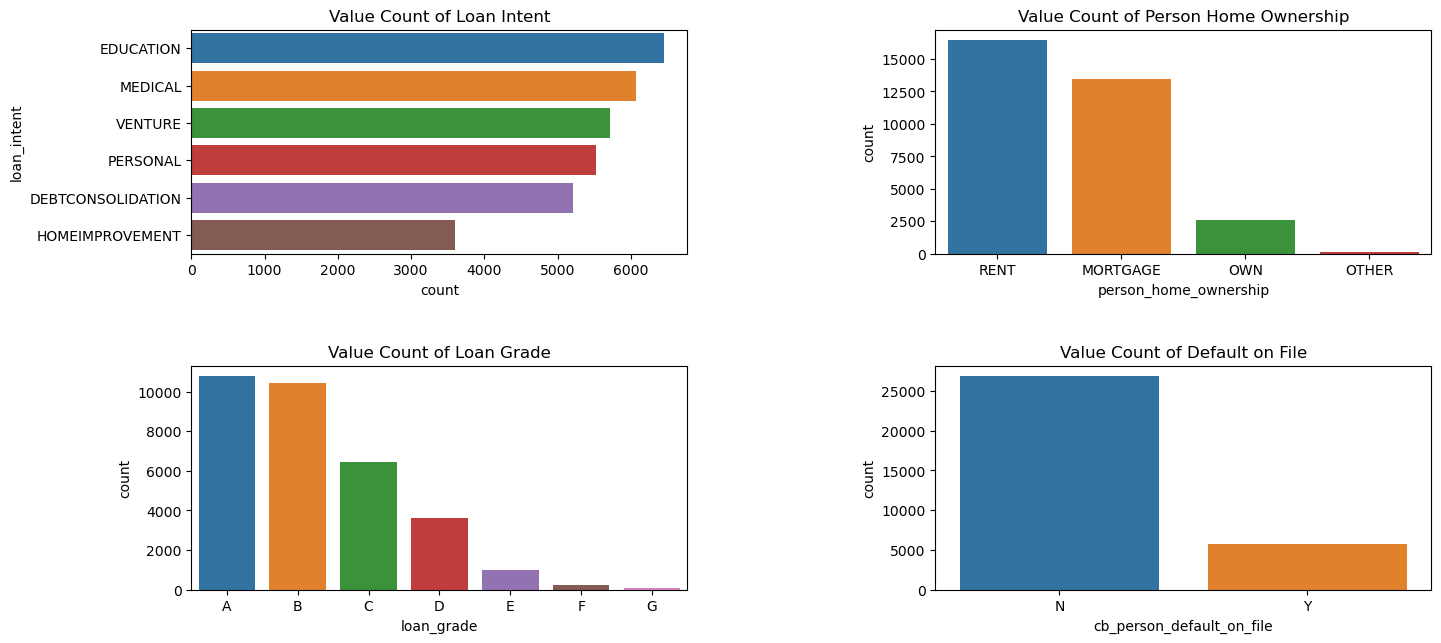

In [76]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(16,16)

plt.subplot(4,2,1)
sns.countplot(y=catego["loan_intent"],order=catego["loan_intent"].value_counts().index)
plt.title("Value Count of Loan Intent")

plt.subplot(4,2,2)
sns.countplot(x=catego["person_home_ownership"],order=catego["person_home_ownership"].value_counts().index)
plt.title("Value Count of Person Home Ownership")

plt.subplot(4,2,3)
sns.countplot(x=catego["loan_grade"],order=catego["loan_grade"].value_counts().index)
plt.title("Value Count of Loan Grade")

plt.subplot(4,2,4)
sns.countplot(x=catego["cb_person_default_on_file"],order=catego["cb_person_default_on_file"].value_counts().index)
plt.title("Value Count of Default on File")

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)
plt.show()

### Bivariate analysis - Hypothesis Validation

#### 1) More defaults for the younger peoples - 

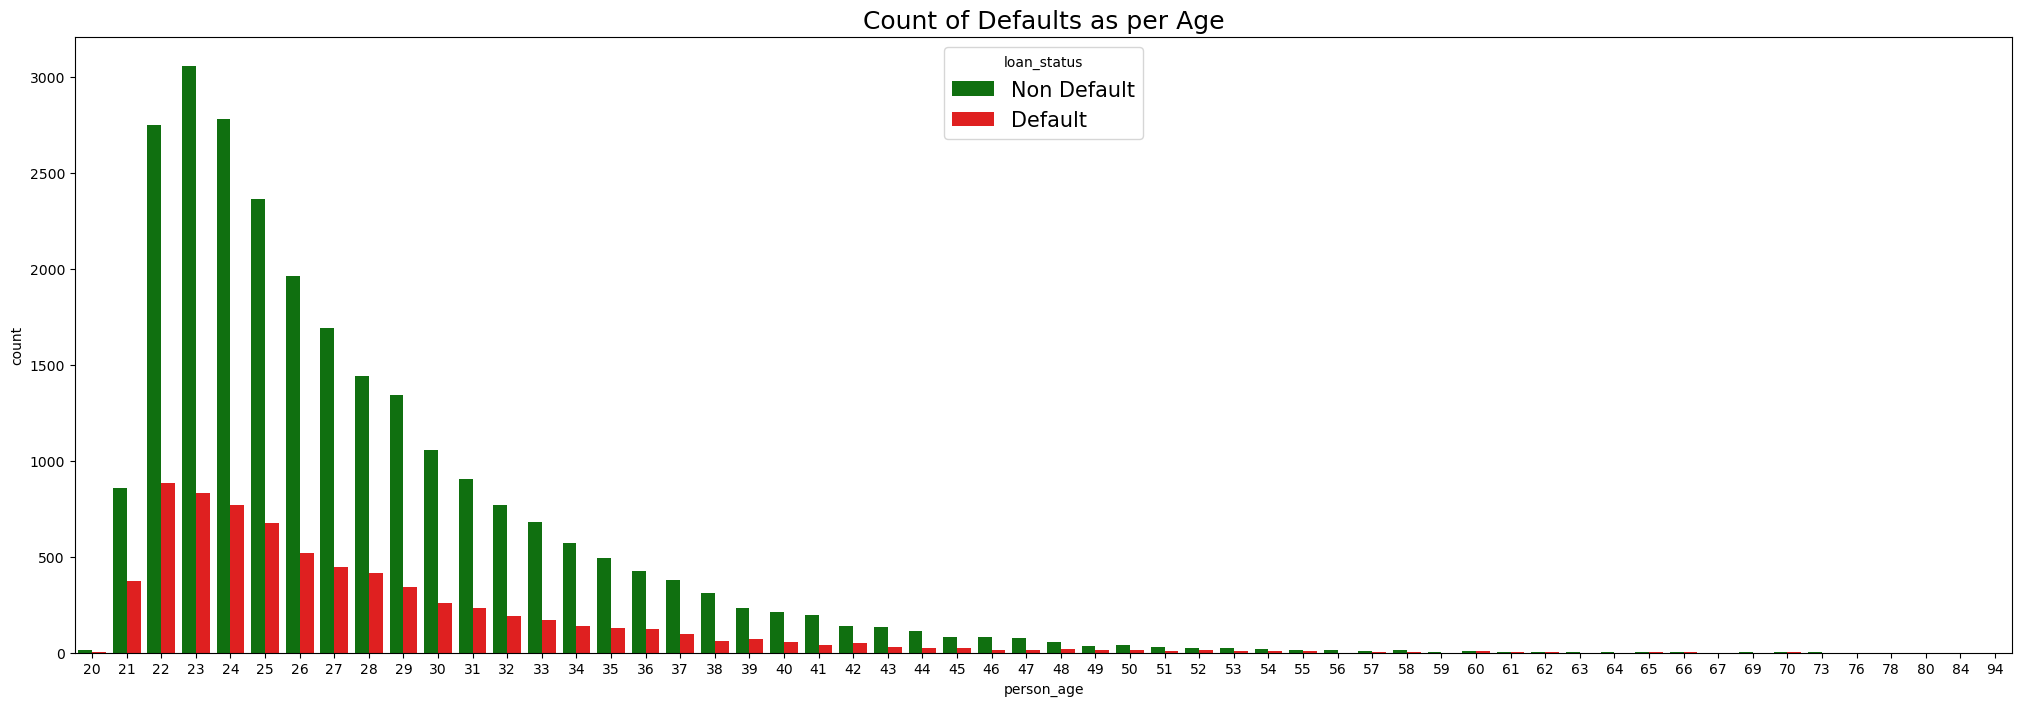

In [49]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(25,8)

sns.countplot(x=df_2["person_age"],hue=df_2["loan_status"],palette=["g","r"])
ax.set_title("Count of Defaults as per Age", fontsize=18)
plt.legend(title="loan_status",labels=["Non Default","Default"],fontsize=15)
plt.show()

In [74]:
# As we can see there are more cases of Default up to the young age of 20 to 40. 
# Thus Hypothesis is True

#### 2) People who defults have less income than people who have not defaults - 

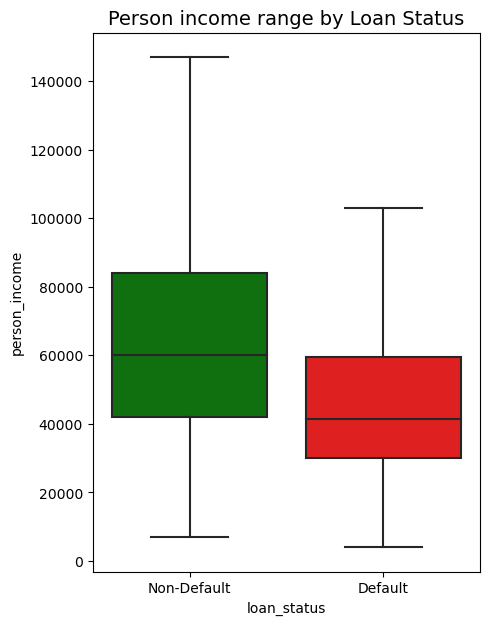

In [22]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(5,7)

sns.boxplot(y = df_2["person_income"], x= df_2["loan_status"],showfliers=False,palette=["g","r"])
ax.set_title("Person income range by Loan Status", fontsize=14)
plt.xticks([0,1],["Non-Default","Default"])
plt.show()

In [39]:
default = df_2[df_2["loan_status"] == 1]
nondefault = df_2[df_2["loan_status"] == 0]
print("Median of Loan Ammount for Defauts - ",default["person_income"].median())
print("Median of Loan Ammount for Non-Defauts - ",nondefault["person_income"].median())

Median of Loan Ammount for Defauts -  41496.0
Median of Loan Ammount for Non-Defauts -  60000.0


In [ ]:
# as we can see peoples who have defaults their incomes mean is less than peoples who have not default.
# thus Hypothesis is True

#### 3) Mortgage have more cases of default followed by rent and own - 

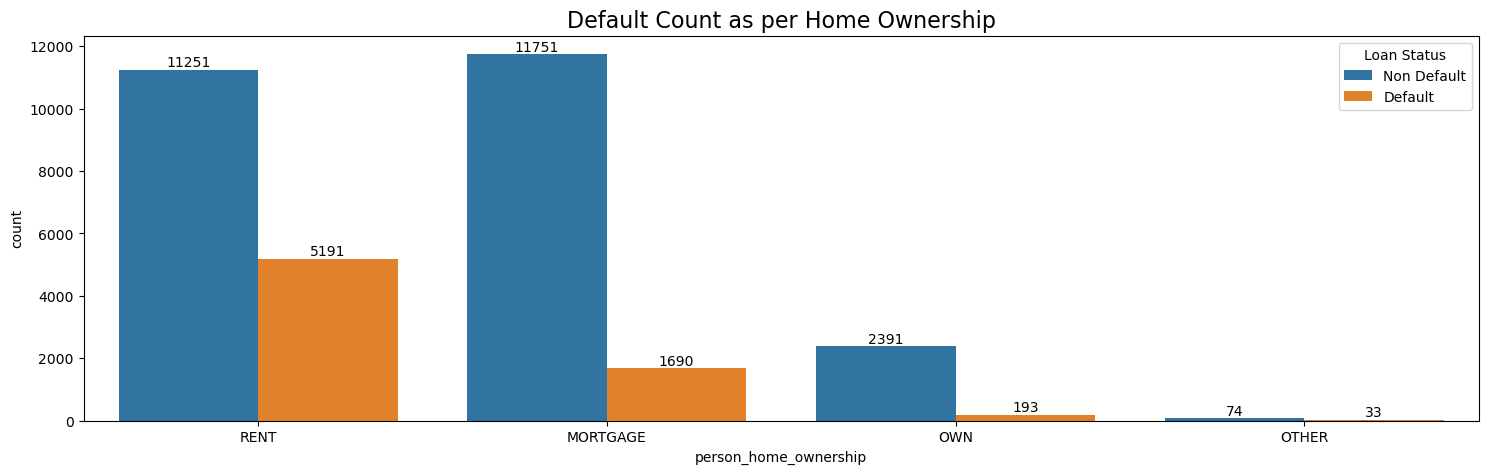

In [74]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(18,5)

sns.countplot(x = df_2["person_home_ownership"],hue = df_2["loan_status"],
            order =df_2["person_home_ownership"].value_counts().index)
ax.set_title("Default Count as per Home Ownership", fontsize= 16)
plt.legend(title="Loan Status", labels=["Non Default","Default"],title_fontsize=10)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

In [54]:
# As we can see Default cases for rent are more and then its followed by mortgage, own and other.
# Thus our Hypothesis is False

#### 4) There are fewer cases of default with long employment term -

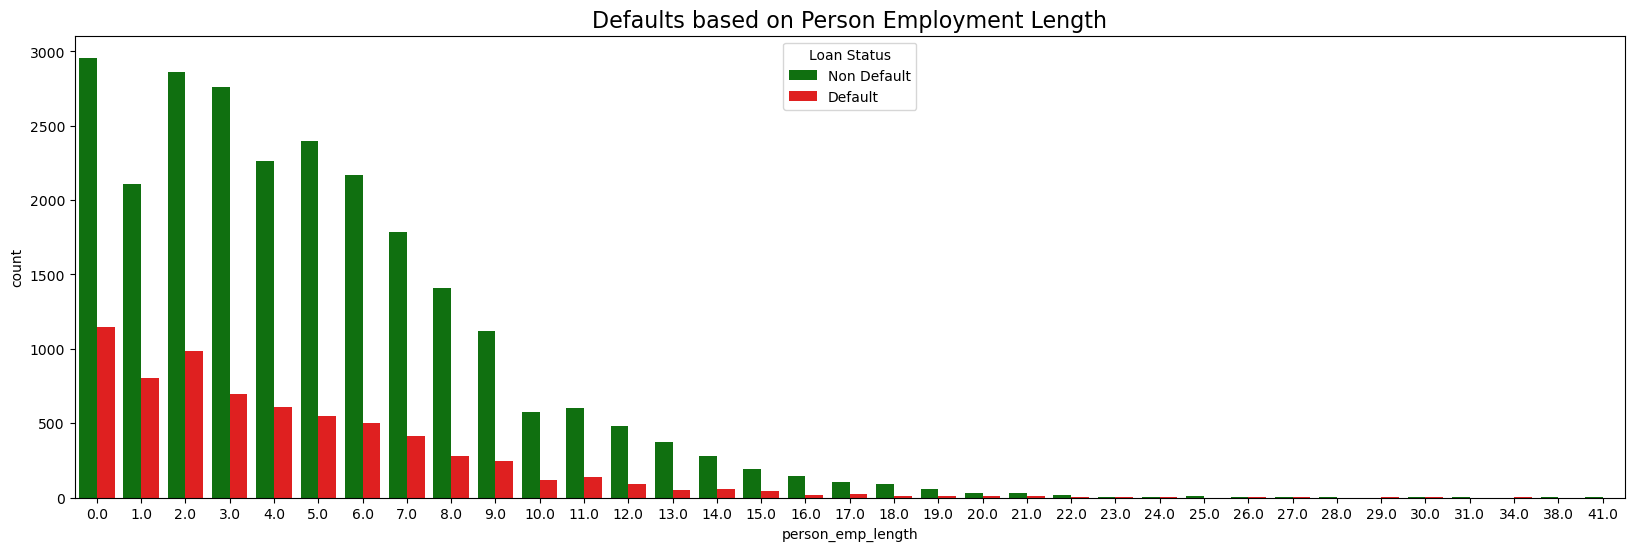

In [69]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,6)

sns.countplot(x = df_2["person_emp_length"],hue=df_2["loan_status"],palette=["g","r"])
ax.set_title("Defaults based on Person Employment Length", fontsize=16)
ax.legend(title="Loan Status", labels=["Non Default","Default"], fontsize=10)
plt.show()

In [ ]:
# we can see from the above chart there are fewer peoples of default after long employment length after 15 years.
# Thus our Hypothesis is True

#### 5) There are more cases of default for personal intent which is followed by educational ,home improvment, medical etc. -

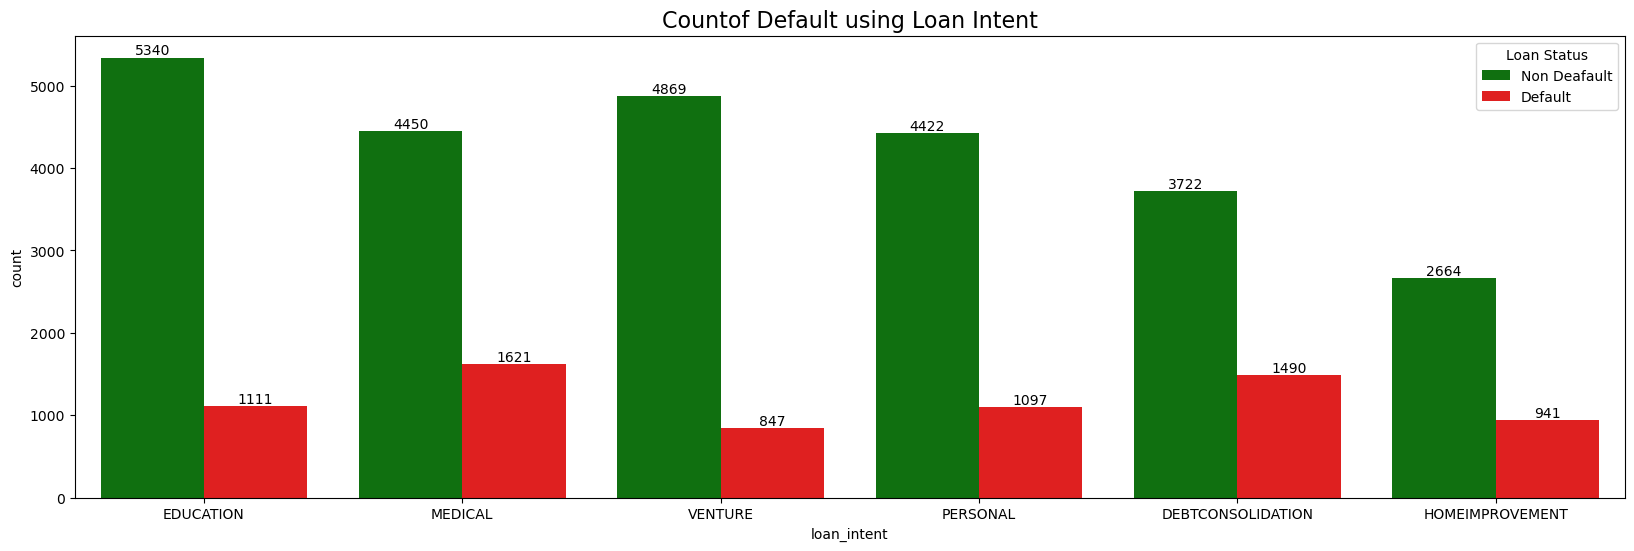

In [77]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,6)

sns.countplot(x = df_2["loan_intent"], hue=df_2["loan_status"],palette=["g","r"],
             order=df_2["loan_intent"].value_counts().index)
ax.set_title("Countof Default using Loan Intent", fontsize = 16)
ax.legend(title="Loan Status", labels = ["Non Deafault","Default"], fontsize=10)
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# From above Graph There are more cases of Default for Medical Which is Followed by debt consolidation,
# Education and personal case. 
# Thus Hypothesis is False.

#### 6) least cases of default for venture -

In [ ]:
# from above countplot we clearly see that Venture intent has least defaults.
# Thus Hypothesis is True.

#### 7) The higher the grade there are fewer cases of default -

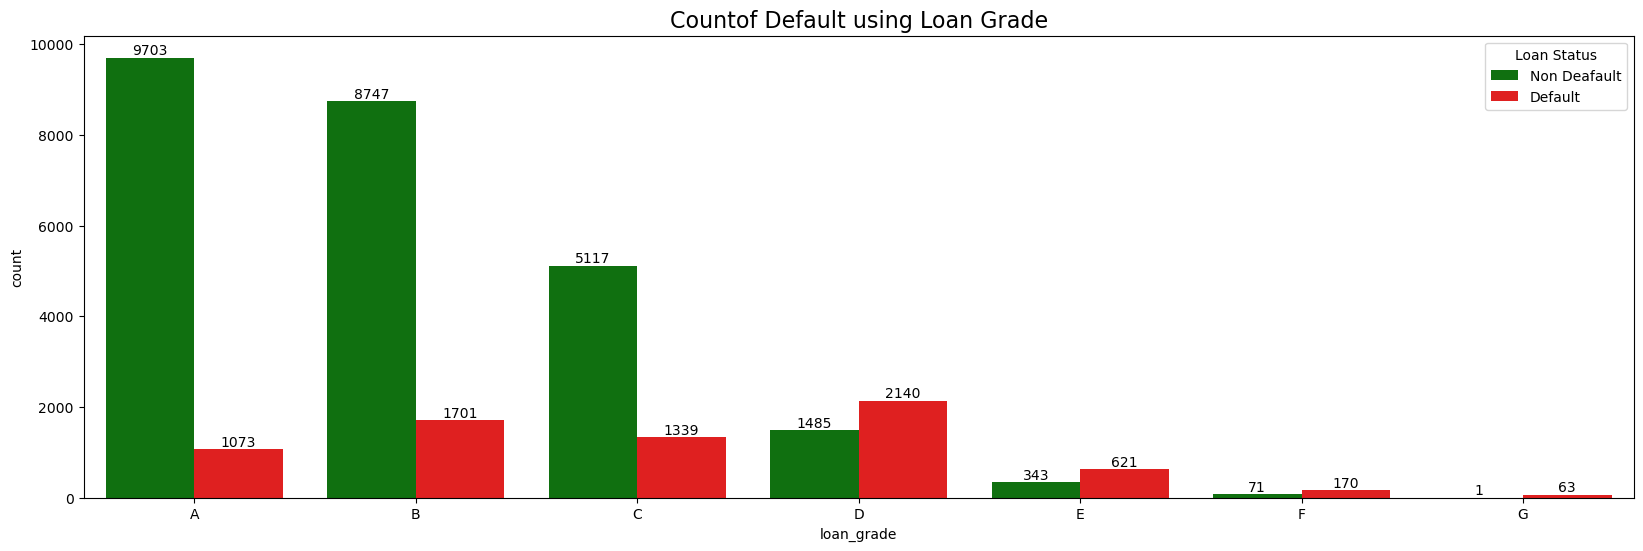

In [99]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,6)

sns.countplot(x = df_2["loan_grade"], hue=df_2["loan_status"],palette=["g","r"],
             order=df_2["loan_grade"].value_counts().index)
ax.set_title("Countof Default using Loan Grade", fontsize = 16)
ax.legend(title="Loan Status", labels = ["Non Deafault","Default"], fontsize=10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# From above graph we see that there id loan grade d has highest default but now we cannot say there are higher 
# grade then cases of defaults are less.
# Thus our Hypothesis is False.

#### 8) Median of ammount for non default is lower than median for default -

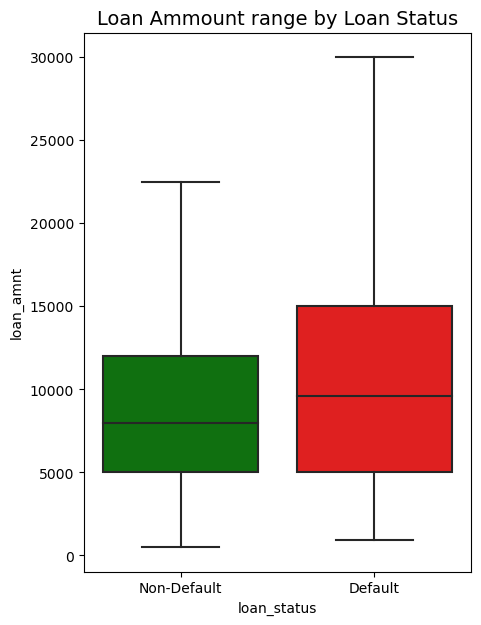

In [84]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(5,7)

sns.boxplot(y = df_2["loan_amnt"], x= df_2["loan_status"],showfliers=False,palette=["g","r"])
ax.set_title("Loan Ammount range by Loan Status", fontsize=14)
plt.xticks([0,1],["Non-Default","Default"])
plt.show()

In [40]:
print("Median of Loan Ammount for Defauts - ",default["loan_amnt"].median())
print("Median of Loan Ammount for Non-Defauts - ",nondefault["loan_amnt"].median())

Median of Loan Ammount for Defauts -  9600.0
Median of Loan Ammount for Non-Defauts -  8000.0


In [ ]:
# as we can see clearly median Values of Loan ammount according to loan status,Median loan ammount of defaults is Higher. 
# Thus our Hypothesis is True.

#### 9) Higher the intrest rate there are high defaults -

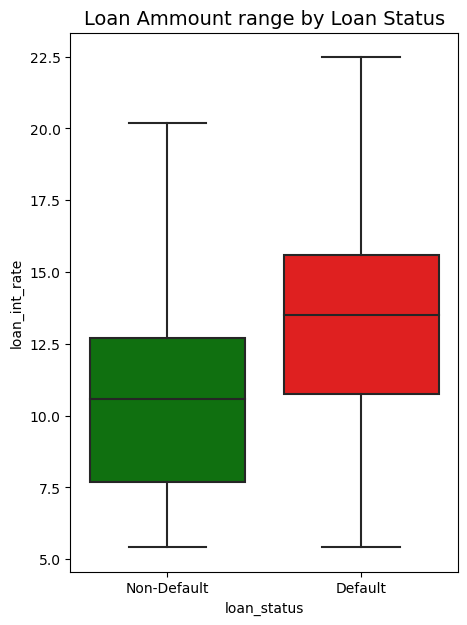

In [92]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(5,7)

sns.boxplot(y = df_2["loan_int_rate"], x= df_2["loan_status"],showfliers=False,palette=["g","r"])
ax.set_title("Loan Intrest Rate range by Loan Status", fontsize=14)
plt.xticks([0,1],["Non-Default","Default"])
plt.show()

In [94]:
print("Median of Loan Intrest Rate for Defauts - ",default["loan_int_rate"].median())
print("Median of Loan Intrest Rate for Non-Defauts - ",nondefault["loan_int_rate"].median())

Median of Loan Intrest Rate for Defauts -  13.49
Median of Loan Intrest Rate for Non-Defauts -  10.59


In [ ]:
# From above values of intrest rate median its clear that Higher the intrst rate there are more defaults.
# Thus our Hypothesis is True.

#### 10) People who allocate higher percentage of income to the loan tend to default more than people who allocate less - 

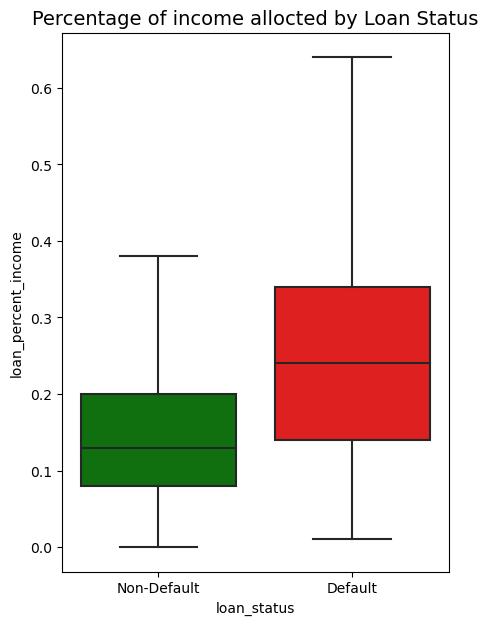

In [95]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(5,7)

sns.boxplot(y = df_2["loan_percent_income"], x= df_2["loan_status"],showfliers=False,palette=["g","r"])
ax.set_title("Percentage of income allocted by Loan Status", fontsize=14)
plt.xticks([0,1],["Non-Default","Default"])
plt.show()

In [96]:
print("Median of Loan Percent Income for Defauts - ",default["loan_percent_income"].median())
print("Median of Loan Percent Income for Non-Defauts - ",nondefault["loan_percent_income"].median())

Median of Loan Percent Income for Defauts -  0.24
Median of Loan Percent Income for Non-Defauts -  0.13


In [97]:
# From above values of median of loan percent income and charts we say that people who allocate higher percent of income 
# to loan they will tend to default more than people who allocate less.
# Thus our Hypothesis is True.

#### 11) There are more cases of default those have default on file -

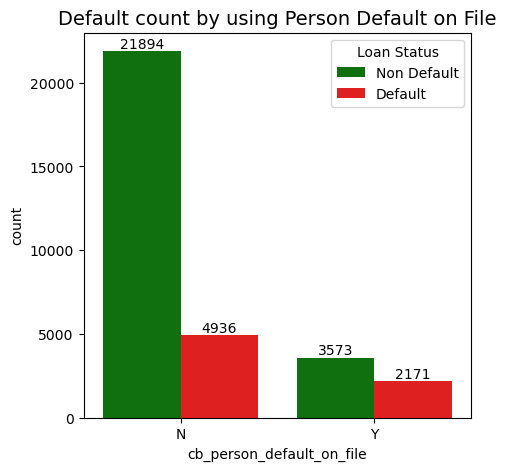

In [100]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(5,5)

sns.countplot(x = df_2["cb_person_default_on_file"], hue=df_2["loan_status"],palette=["g","r"])
ax.set_title("Default count by using Person Default on File", fontsize=14)
ax.legend(title="Loan Status", labels=["Non Default","Default"], fontsize=10)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
# From graph we can conclude that persons who dont have default on file those have more defaults.
# Thus our Hypothesis is False. 

#### 12) There are fewer cases of default those have higher credit history length - 

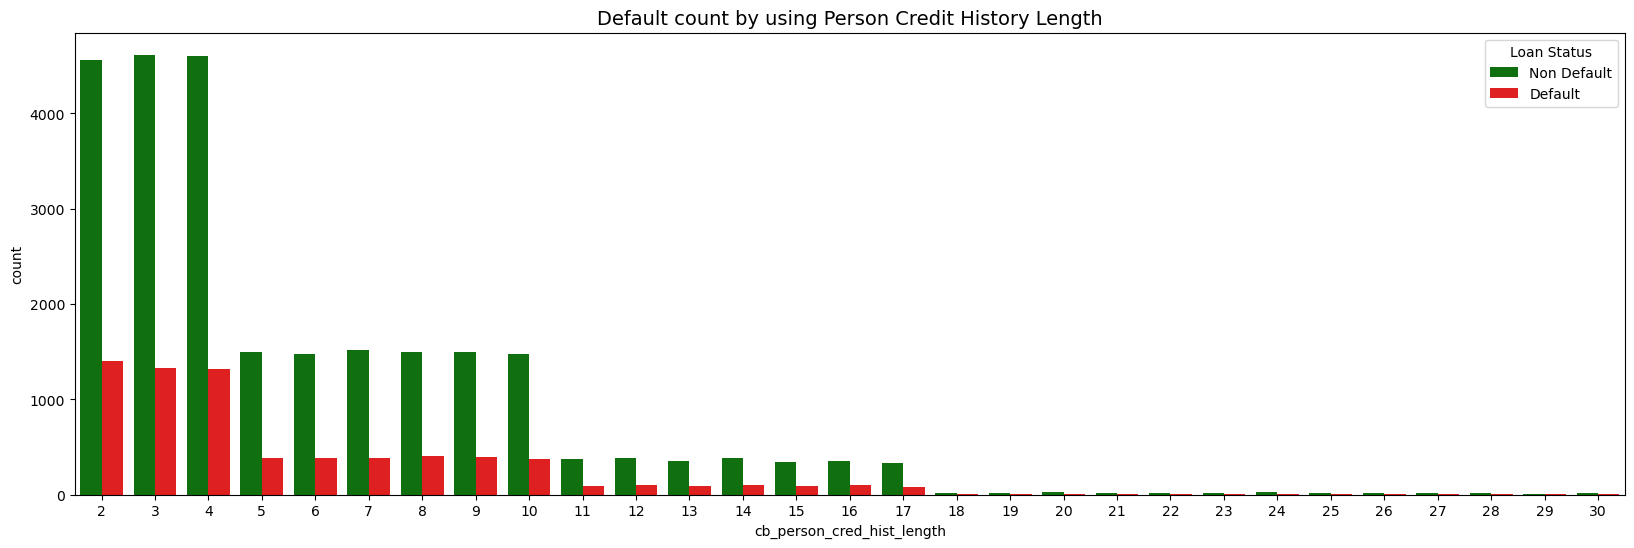

In [103]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,6)

sns.countplot(x = df_2["cb_person_cred_hist_length"], hue=df_2["loan_status"],palette=["g","r"])
ax.set_title("Default count by using Person Credit History Length", fontsize=14)
ax.legend(title="Loan Status", labels=["Non Default","Default"], fontsize=10)

plt.show()

In [ ]:
# As Observed, there are there are fewer cases of default for people having longer credit history length.
# Thus Hypothesis is True.

### Making Table of Results on Hypothesis Testing -

In [20]:
pd.options.display.max_colwidth = 130
result = pd.DataFrame({"ID":np.arange(1,13),
                    "Hypothesis":["More defaults for the younger peoples.",
                                  "People who defult have less income than people who have not default.",
                                  "Mortgage have more cases of default followed by rent and own.",
                                  "There are fewer people of default after long employment term.",
                                  "There are more cases of default for personal intent which is followed by educational ,home improvment, medical etc.",
                                  "Least cases of default for venture.",
                                  "The higher the grade there are fewer cases of default.",
                                  "Median of ammount for non default is lower than median for default.",
                                  "Higher the intrest rate there high defaults.",
                                  "People who allocate higher percentage of income to the loan tend to default more than people who allocate less.",
                                  "There are more cases of default those have default on file.",
                                  "There are fewer cases of default those have higher credit history length."],
                   "Conclusion":["True","True","False","True","False","True","False","True","True","True","False","True"]})
result.set_index("ID",inplace=True)
result

Hypothesis  \
ID                                                                                                                        
1                                                                                More defaults for the younger peoples.   
2                                                  People who defult have less income than people who have not default.   
3                                                         Mortgage have more cases of default followed by rent and own.   
4                                                         There are fewer people of default after long employment term.   
5   There are more cases of default for personal intent which is followed by educational ,home improvment, medical etc.   
6                                                                                   Least cases of default for venture.   
7                                                                The higher the grade there are fewer cases of default.   
8                                                   Median of ammount for non default is lower than median for default.   
9                                                                          Higher the intrest rate there high defaults.   
10      People who allocate higher percentage of income to the loan tend to default more than people who allocate less.   
11                                                          There are more cases of default those have default on file.   
12                                            There are fewer cases of default those have higher credit history length.   

   Conclusion  
ID             
1        True  
2        True  
3       False  
4        True  
5       False  
6        True  
7       False  
8        True  
9        True  
10       True  
11      False  
12       True

In [47]:
df_2.shape

(32574, 12)

In [48]:
df.shape

(32581, 12)